# Pattern matching for $k$-track permutations

# Preambule

### Imports

In [467]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [468]:
import seaborn as sns
sns.set_context("poster")
sns.set(font_scale=3.0, rc={'text.usetex' : True})
#sns.set(font='serif')
sns.set_style("white", {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]})
sns.set_style("whitegrid")

### Auxiliary functions

In [469]:
def string_to_int(x):
    """Convert a string to int.
    """
    return int(x)

In [470]:
def format_duration(x):
    """Duration in ms.
    """
    (prefix, suffix)=x.split(' ')
    try:
        val = float(prefix)
        if suffix == 'ms' or suffix == 'm':
            return val
        elif suffix == 's':
            return val * 1000
        elif suffix == 'µs':
            return val / 1000
        elif suffix == "h":
            return val * 60 * 60 * 1000
        else: 
            print("prefix=-{}- suffix=-{}-".format(prefix, suffix))
            raise ValueError()
    except:
        raise

In [471]:
def format_strategy(s):
    """Shorter names for strategys.
    """
    try:
        if s == 'leftmost conflict first':
            return 'leftmost conflict first'
        elif s == 'leftmost horizontal conflict first':
            return 'leftmost horizontal conflict first'
        elif s == 'leftmost vertical conflict first':
            return 'leftmost vertical conflict first'
        elif s == 'rightmost conflict first':
            return 'rightmost conflict first'
        elif s == 'rightmost horizontal conflict first':
            return 'rightmost horizontal conflict first'
        elif s == 'rightmost vertical conflict first':
            return 'rightmost vertical conflict first'
    except:
        raise

## Report running time

### Reading and parsing benchmarks

In [472]:
from os import listdir
from os.path import isfile, join

def all_benchmark_files(path="./"):
    """Return the list of all benchmak files.
    """
    return [f for f in listdir(path) if isfile(join(path, f)) if f.startswith("ppattern-benchmark-") if f.endswith(".csv")]

df_benchmarks = {}
for f in all_benchmark_files():
    # parse cvs benchmark file
    #  m:         pattern size
    #  n:         permutation size
    #  k:         pattern is the union of at most k increasings
    #  l:         permutation is the union of at most l increasings
    #  p:         pattern
    #  q:         permutation
    #  embedding: solution
    #  strategy:  conflict selection strategy
    #  duration:  running time
    df_benchmark = pd.read_csv(f, names = ['m', 'n', 'k', 'l', 'p', 'q', 'embedding', 'strategy', 'duration'])
    
    # convert string int to int
    df_benchmark['m'] = df_benchmark['m'].apply(lambda m: string_to_int(m))
    df_benchmark['n'] = df_benchmark['n'].apply(lambda n: string_to_int(n))
    df_benchmark['k'] = df_benchmark['k'].apply(lambda k: string_to_int(k))
    df_benchmark['l'] = df_benchmark['l'].apply(lambda l: string_to_int(l))
    
    # time in ms
    df_benchmark['duration'] = df_benchmark['duration'].apply(lambda x: format_duration(x))
    
    # shorter names for strategys
    #df_benchmark['strategy'] = df_benchmark['strategy'].apply(lambda s: format_strategy(s))

    # drop p column
    df_benchmark = df_benchmark.drop('p', 1)
    
    # drop q column
    df_benchmark = df_benchmark.drop('q', 1)
    
    # drop embedding column
    df_benchmark = df_benchmark.drop('embedding', 1)
    
    # split and add to the collection
    splitter = f.split('-')
    m = splitter[3].zfill(2)
    n = splitter[5].zfill(2)
    k = splitter[7].zfill(2)
    l = splitter[9].split('.')[0].zfill(2) # another split to remove the .csv suffix
    df_benchmarks[(m, n, k, l)] = df_benchmark
    

In [473]:
# show all benchmarks
print(df_benchmarks)
for key in sorted(df_benchmarks):
    print(key)
    print(df_benchmarks[key].describe())
    print()

{('10', '200', '02', '02'):        m    n  k  l                             strategy  duration
0     10  200  2  2              leftmost conflict first   4.04000
1     10  200  2  2   leftmost horizontal conflict first   0.84958
2     10  200  2  2     leftmost vertical conflict first   0.83498
3     10  200  2  2             rightmost conflict first   0.73063
4     10  200  2  2  rightmost horizontal conflict first   0.79335
5     10  200  2  2    rightmost vertical conflict first   0.65604
6     10  200  2  2              leftmost conflict first   3.13000
7     10  200  2  2   leftmost horizontal conflict first   0.67378
8     10  200  2  2     leftmost vertical conflict first   0.55672
9     10  200  2  2             rightmost conflict first   0.50238
10    10  200  2  2  rightmost horizontal conflict first   0.51943
11    10  200  2  2    rightmost vertical conflict first   0.58606
12    10  200  2  2              leftmost conflict first   2.26000
13    10  200  2  2   leftmost hor

            m       n       k       l     duration
count  2100.0  2100.0  2100.0  2100.0  2100.000000
mean     10.0   200.0     5.0     7.0    12.441266
std       0.0     0.0     0.0     0.0    71.992615
min      10.0   200.0     5.0     7.0     0.280630
25%      10.0   200.0     5.0     7.0     0.881528
50%      10.0   200.0     5.0     7.0     1.755000
75%      10.0   200.0     5.0     7.0     4.512500
max      10.0   200.0     5.0     7.0  1220.000000

('10', '200', '06', '06')
            m       n       k       l     duration
count  2100.0  2100.0  2100.0  2100.0  2100.000000
mean     10.0   200.0     6.0     6.0     3.450553
std       0.0     0.0     0.0     0.0     5.381682
min      10.0   200.0     6.0     6.0     0.076900
25%      10.0   200.0     6.0     6.0     0.815542
50%      10.0   200.0     6.0     6.0     1.610000
75%      10.0   200.0     6.0     6.0     4.062500
max      10.0   200.0     6.0     6.0    55.420000

('10', '200', '06', '07')
            m       n       

            m       n       k       l     duration
count  2100.0  2100.0  2100.0  2100.0  2100.000000
mean     14.0   200.0     3.0     4.0     7.542551
std       0.0     0.0     0.0     0.0    29.227107
min      14.0   200.0     3.0     4.0     0.129770
25%      14.0   200.0     3.0     4.0     1.030000
50%      14.0   200.0     3.0     4.0     1.955000
75%      14.0   200.0     3.0     4.0     4.480000
max      14.0   200.0     3.0     4.0   543.060000

('14', '200', '03', '05')
            m       n       k       l     duration
count  2100.0  2100.0  2100.0  2100.0  2100.000000
mean     14.0   200.0     3.0     5.0    21.856621
std       0.0     0.0     0.0     0.0   121.986652
min      14.0   200.0     3.0     5.0     0.251300
25%      14.0   200.0     3.0     5.0     1.197500
50%      14.0   200.0     3.0     5.0     2.605000
75%      14.0   200.0     3.0     5.0     7.047500
max      14.0   200.0     3.0     5.0  2230.000000

('14', '200', '04', '04')
            m       n       

('16', '200', '05', '07')
            m       n       k       l      duration
count  2100.0  2100.0  2100.0  2100.0   2100.000000
mean     16.0   200.0     5.0     7.0    213.918079
std       0.0     0.0     0.0     0.0   1287.716704
min      16.0   200.0     5.0     7.0      0.156100
25%      16.0   200.0     5.0     7.0      3.340000
50%      16.0   200.0     5.0     7.0     11.870000
75%      16.0   200.0     5.0     7.0     55.962500
max      16.0   200.0     5.0     7.0  22230.000000

('16', '200', '06', '06')
            m       n       k       l     duration
count  2100.0  2100.0  2100.0  2100.0  2100.000000
mean     16.0   200.0     6.0     6.0    82.736044
std       0.0     0.0     0.0     0.0   269.112811
min      16.0   200.0     6.0     6.0     0.070120
25%      16.0   200.0     6.0     6.0     2.730000
50%      16.0   200.0     6.0     6.0     8.095000
75%      16.0   200.0     6.0     6.0    38.352500
max      16.0   200.0     6.0     6.0  2680.000000

('16', '200', '06',

max      20.0   200.0     3.0     4.0  6880.000000

('20', '200', '03', '05')
            m       n       k       l      duration
count  2100.0  2100.0  2100.0  2100.0   2100.000000
mean     20.0   200.0     3.0     5.0    548.443213
std       0.0     0.0     0.0     0.0   2748.287874
min      20.0   200.0     3.0     5.0      0.295090
25%      20.0   200.0     3.0     5.0      4.627500
50%      20.0   200.0     3.0     5.0     15.265000
75%      20.0   200.0     3.0     5.0     99.405000
max      20.0   200.0     3.0     5.0  32820.000000

('20', '200', '04', '04')
            m       n       k       l     duration
count  2100.0  2100.0  2100.0  2100.0  2100.000000
mean     20.0   200.0     4.0     4.0    32.380640
std       0.0     0.0     0.0     0.0   165.810649
min      20.0   200.0     4.0     4.0     0.082140
25%      20.0   200.0     4.0     4.0     2.155000
50%      20.0   200.0     4.0     4.0     4.695000
75%      20.0   200.0     4.0     4.0    12.905000
max      20.0   200

Concat pandas data frames by pattern size.

### Reporting benchmarks by pattern size and split parameter.

In [474]:
keys = df_benchmarks.keys()
ms = sorted(list(set(key[0] for key in keys)))
ns = sorted(list(set(key[1] for key in keys)))
ks = sorted(list(set(key[2] for key in keys)))
ls = sorted(list(set(key[3] for key in keys)))

print(ms)
print(ns)
print(ks)
print(ls)

['10', '12', '14', '16', '18', '20']
['200']
['02', '03', '04', '05', '06']
['02', '03', '04', '05', '06', '07', '08']


i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


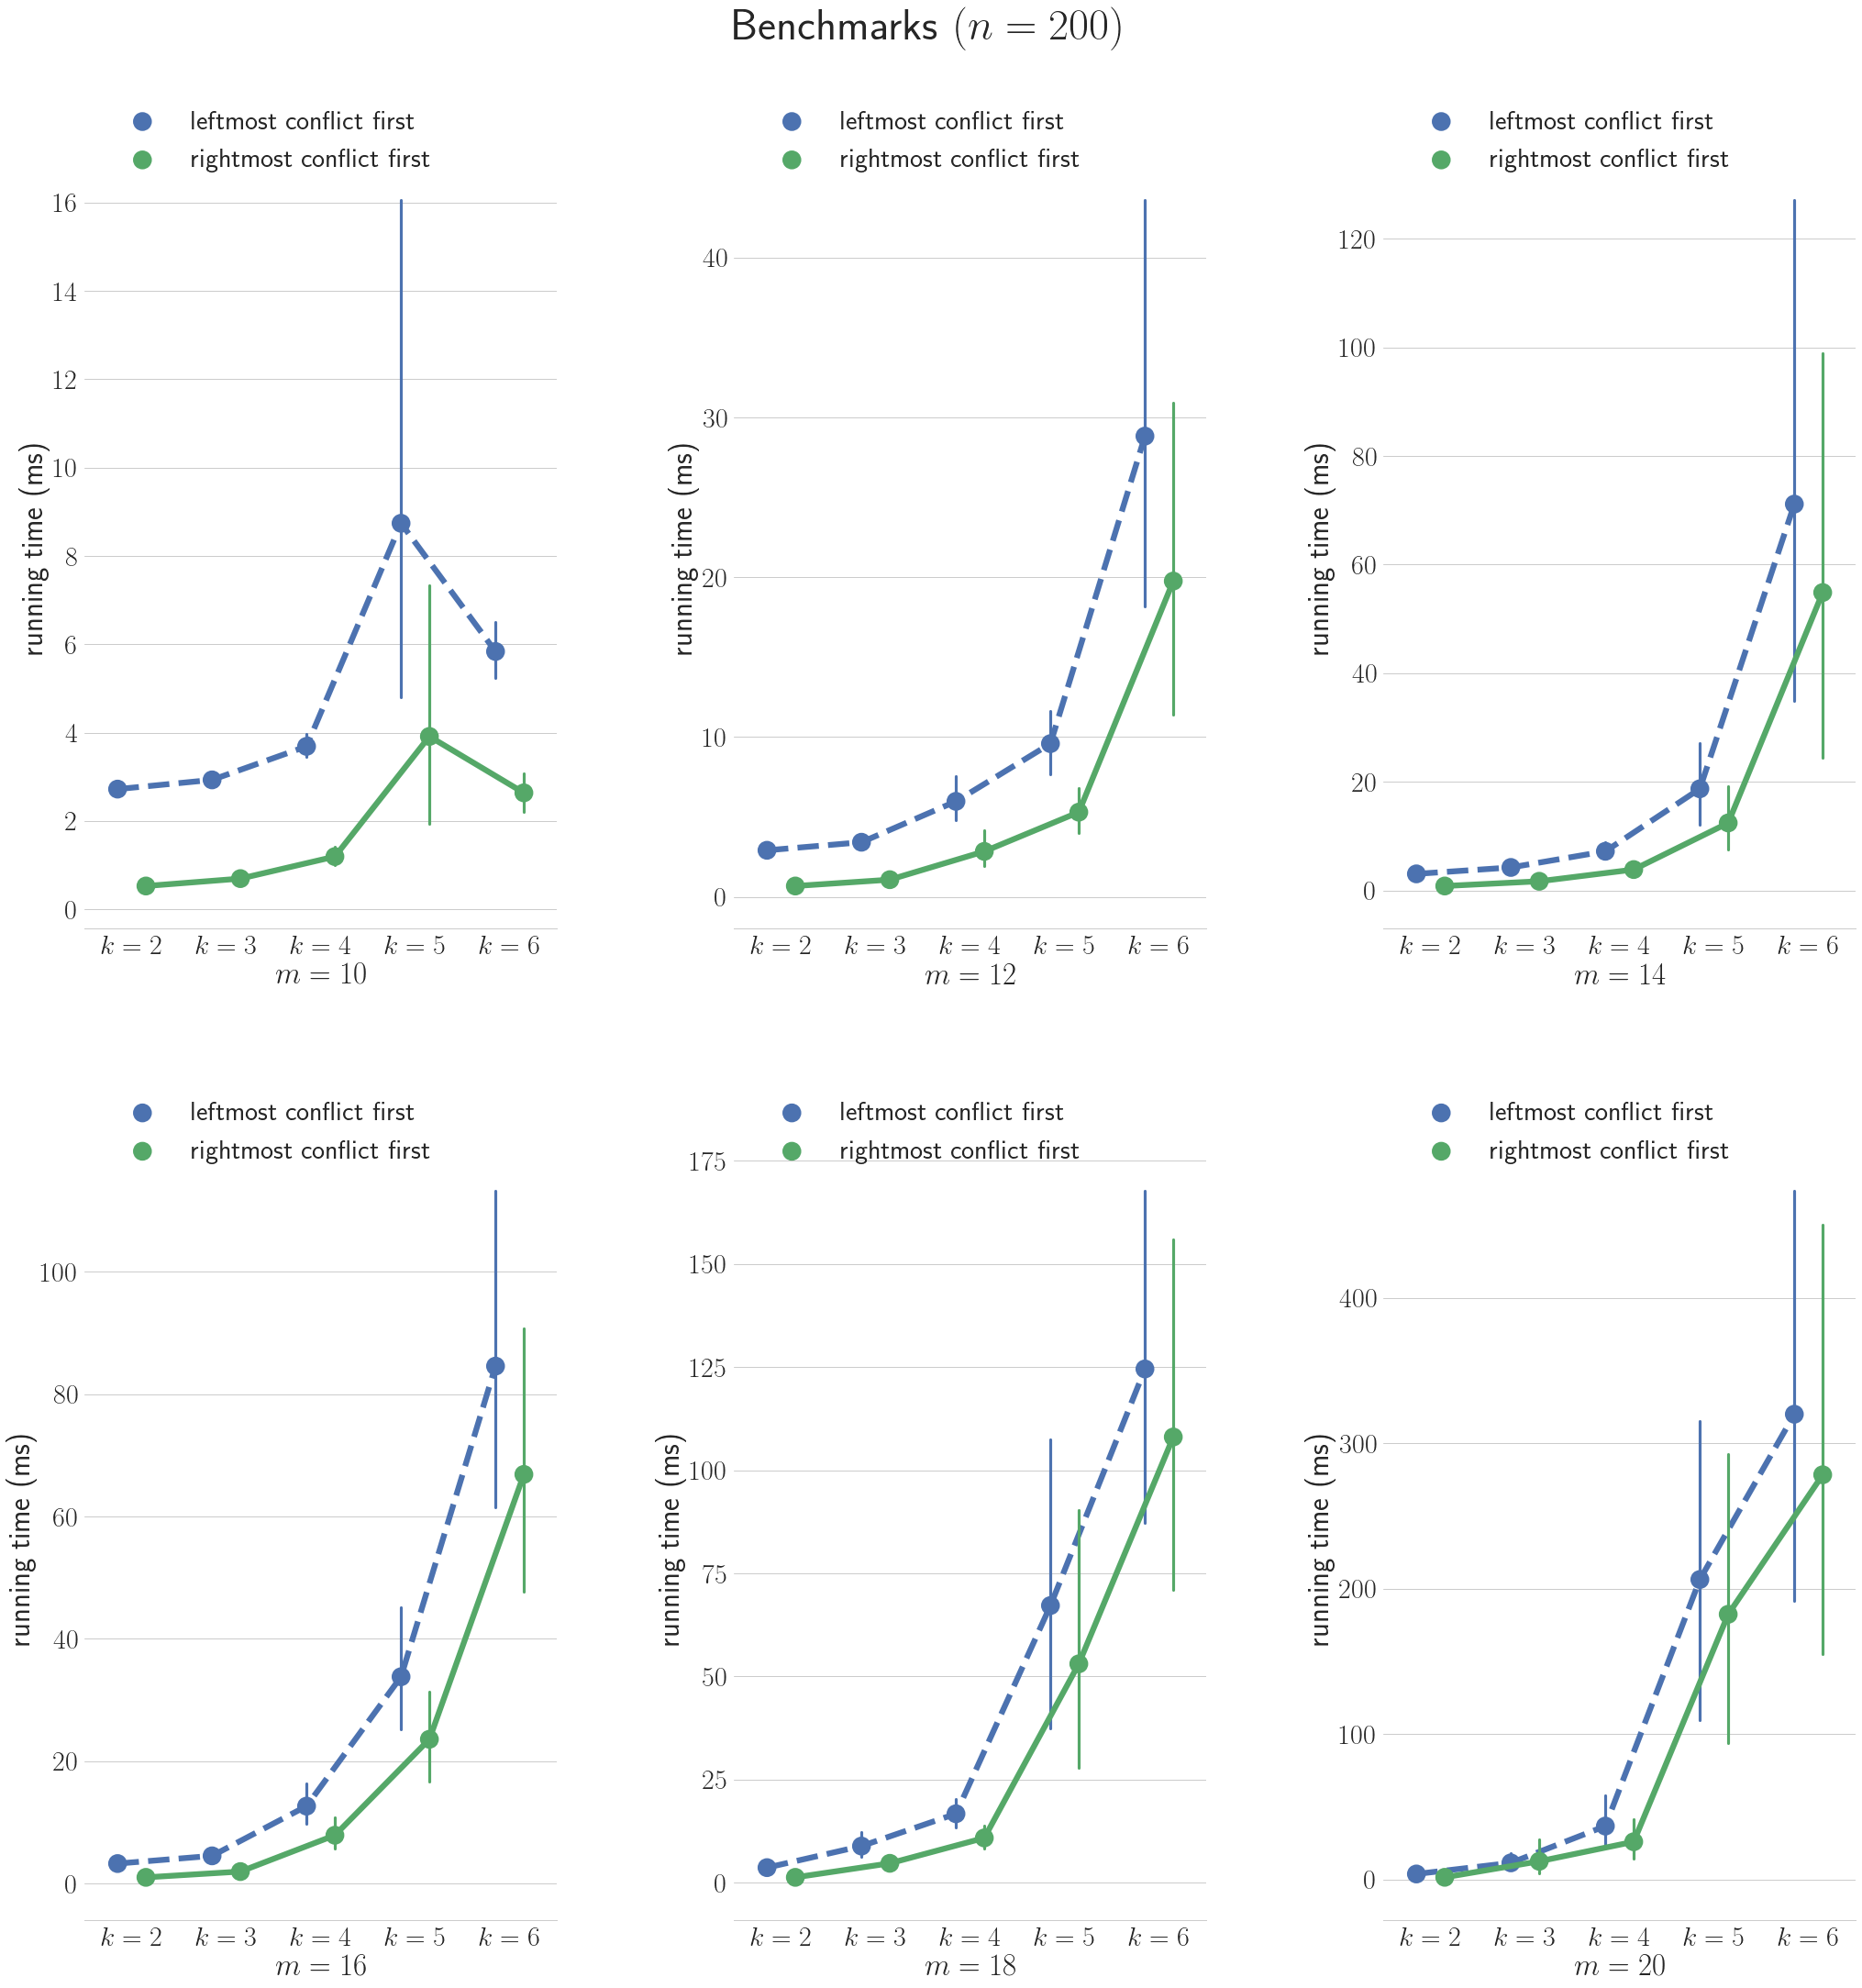

In [475]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['leftmost conflict first', 'rightmost conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.03)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=2.,
                      dodge=.3, join=True, markers=["o", "o"], linestyles=["--", "-"])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.105), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks', m, n, k, k])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)


In [464]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted([int(k) for k in df_complete.k.unique()])
print('k values={}'.format(k_values))

ttest_inds = {}
ttest_rels = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_excerpt = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_conflict_first  = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost conflict first']
        df_rightmost_conflict_first = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost conflict first']
        
        # Perform the t-test
        ttest_inds[(m, k)] = ttest_ind(df_leftmost_conflict_first['duration'].values, 
                                       df_rightmost_conflict_first['duration'].values)
        ttest_rels[(m, k)] = ttest_rel(df_leftmost_conflict_first['duration'].values, 
                                       df_rightmost_conflict_first['duration'].values)
                    

m values=[10, 12, 14, 16, 18, 20]
k values=[2, 4, 6, 8, 10]


In [465]:
for (m, k) in ttest_inds:
    t_statistic = ttest_inds[(m, k)][0]
    p_value     = ttest_inds[(m, k)][1]
    print("m={}, k={}, t-statistic={}, pvalue={}".format(m, k, t_statistic, p_value))

m=10, k=2, t-statistic=30.507165852358263, pvalue=2.9385203062416832e-114
m=10, k=4, t-statistic=3.625498605127847, pvalue=0.00031936868509324255
m=10, k=6, t-statistic=1.5574706874001438, pvalue=0.12002058931170125
m=10, k=8, t-statistic=1.2682870222800562, pvalue=0.20531282426696085
m=10, k=10, t-statistic=0.7727560417255642, pvalue=0.44004870410597696
m=12, k=2, t-statistic=3.3174939171484934, pvalue=0.000977544921760954
m=12, k=4, t-statistic=1.7401838372179397, pvalue=0.08247031402273311
m=12, k=6, t-statistic=1.0839794959209978, pvalue=0.278920334784118
m=12, k=8, t-statistic=0.6399699659978001, pvalue=0.5224987442620388
m=12, k=10, t-statistic=0.5289855386395589, pvalue=0.5970610311447979
m=14, k=2, t-statistic=3.0332086158376144, pvalue=0.002551320198582279
m=14, k=4, t-statistic=0.6812320425425499, pvalue=0.49605456589940844
m=14, k=6, t-statistic=0.8757106475374267, pvalue=0.38162718854488653
m=14, k=8, t-statistic=0.40623103535076327, pvalue=0.6847546530763591
m=14, k=10, t-

In [466]:
for (m, k) in ttest_rels:
    t_statistic = ttest_rels[(m, k)][0]
    p_value     = ttest_rels[(m, k)][1]
    print("m={}, k={}, t-statistic={}, pvalue={}".format(m, k, t_statistic, p_value))

m=10, k=2, t-statistic=56.451588001359546, pvalue=3.48835705755042e-140
m=10, k=4, t-statistic=12.774905274591532, pvalue=7.82532907327229e-29
m=10, k=6, t-statistic=4.860675658820425, pvalue=2.1197294002871574e-06
m=10, k=8, t-statistic=5.743231444584663, pvalue=2.8098448799103203e-08
m=10, k=10, t-statistic=6.521968107864816, pvalue=4.095514113340825e-10
m=12, k=2, t-statistic=15.993853790013608, pvalue=1.2238578690096327e-39
m=12, k=4, t-statistic=5.34791124997509, pvalue=2.078891524557704e-07
m=12, k=6, t-statistic=4.511363660444296, pvalue=1.0104593679560965e-05
m=12, k=8, t-statistic=4.745402515482389, pvalue=3.5836123634333657e-06
m=12, k=10, t-statistic=4.725658508891336, pvalue=3.917110524079385e-06
m=14, k=2, t-statistic=13.91831986217426, pvalue=1.1925281020225552e-32
m=14, k=4, t-statistic=1.6631437045763946, pvalue=0.0975944118531559
m=14, k=6, t-statistic=4.815849860189296, pvalue=2.602834449862451e-06
m=14, k=8, t-statistic=2.2502354897244223, pvalue=0.025344201431896526

i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


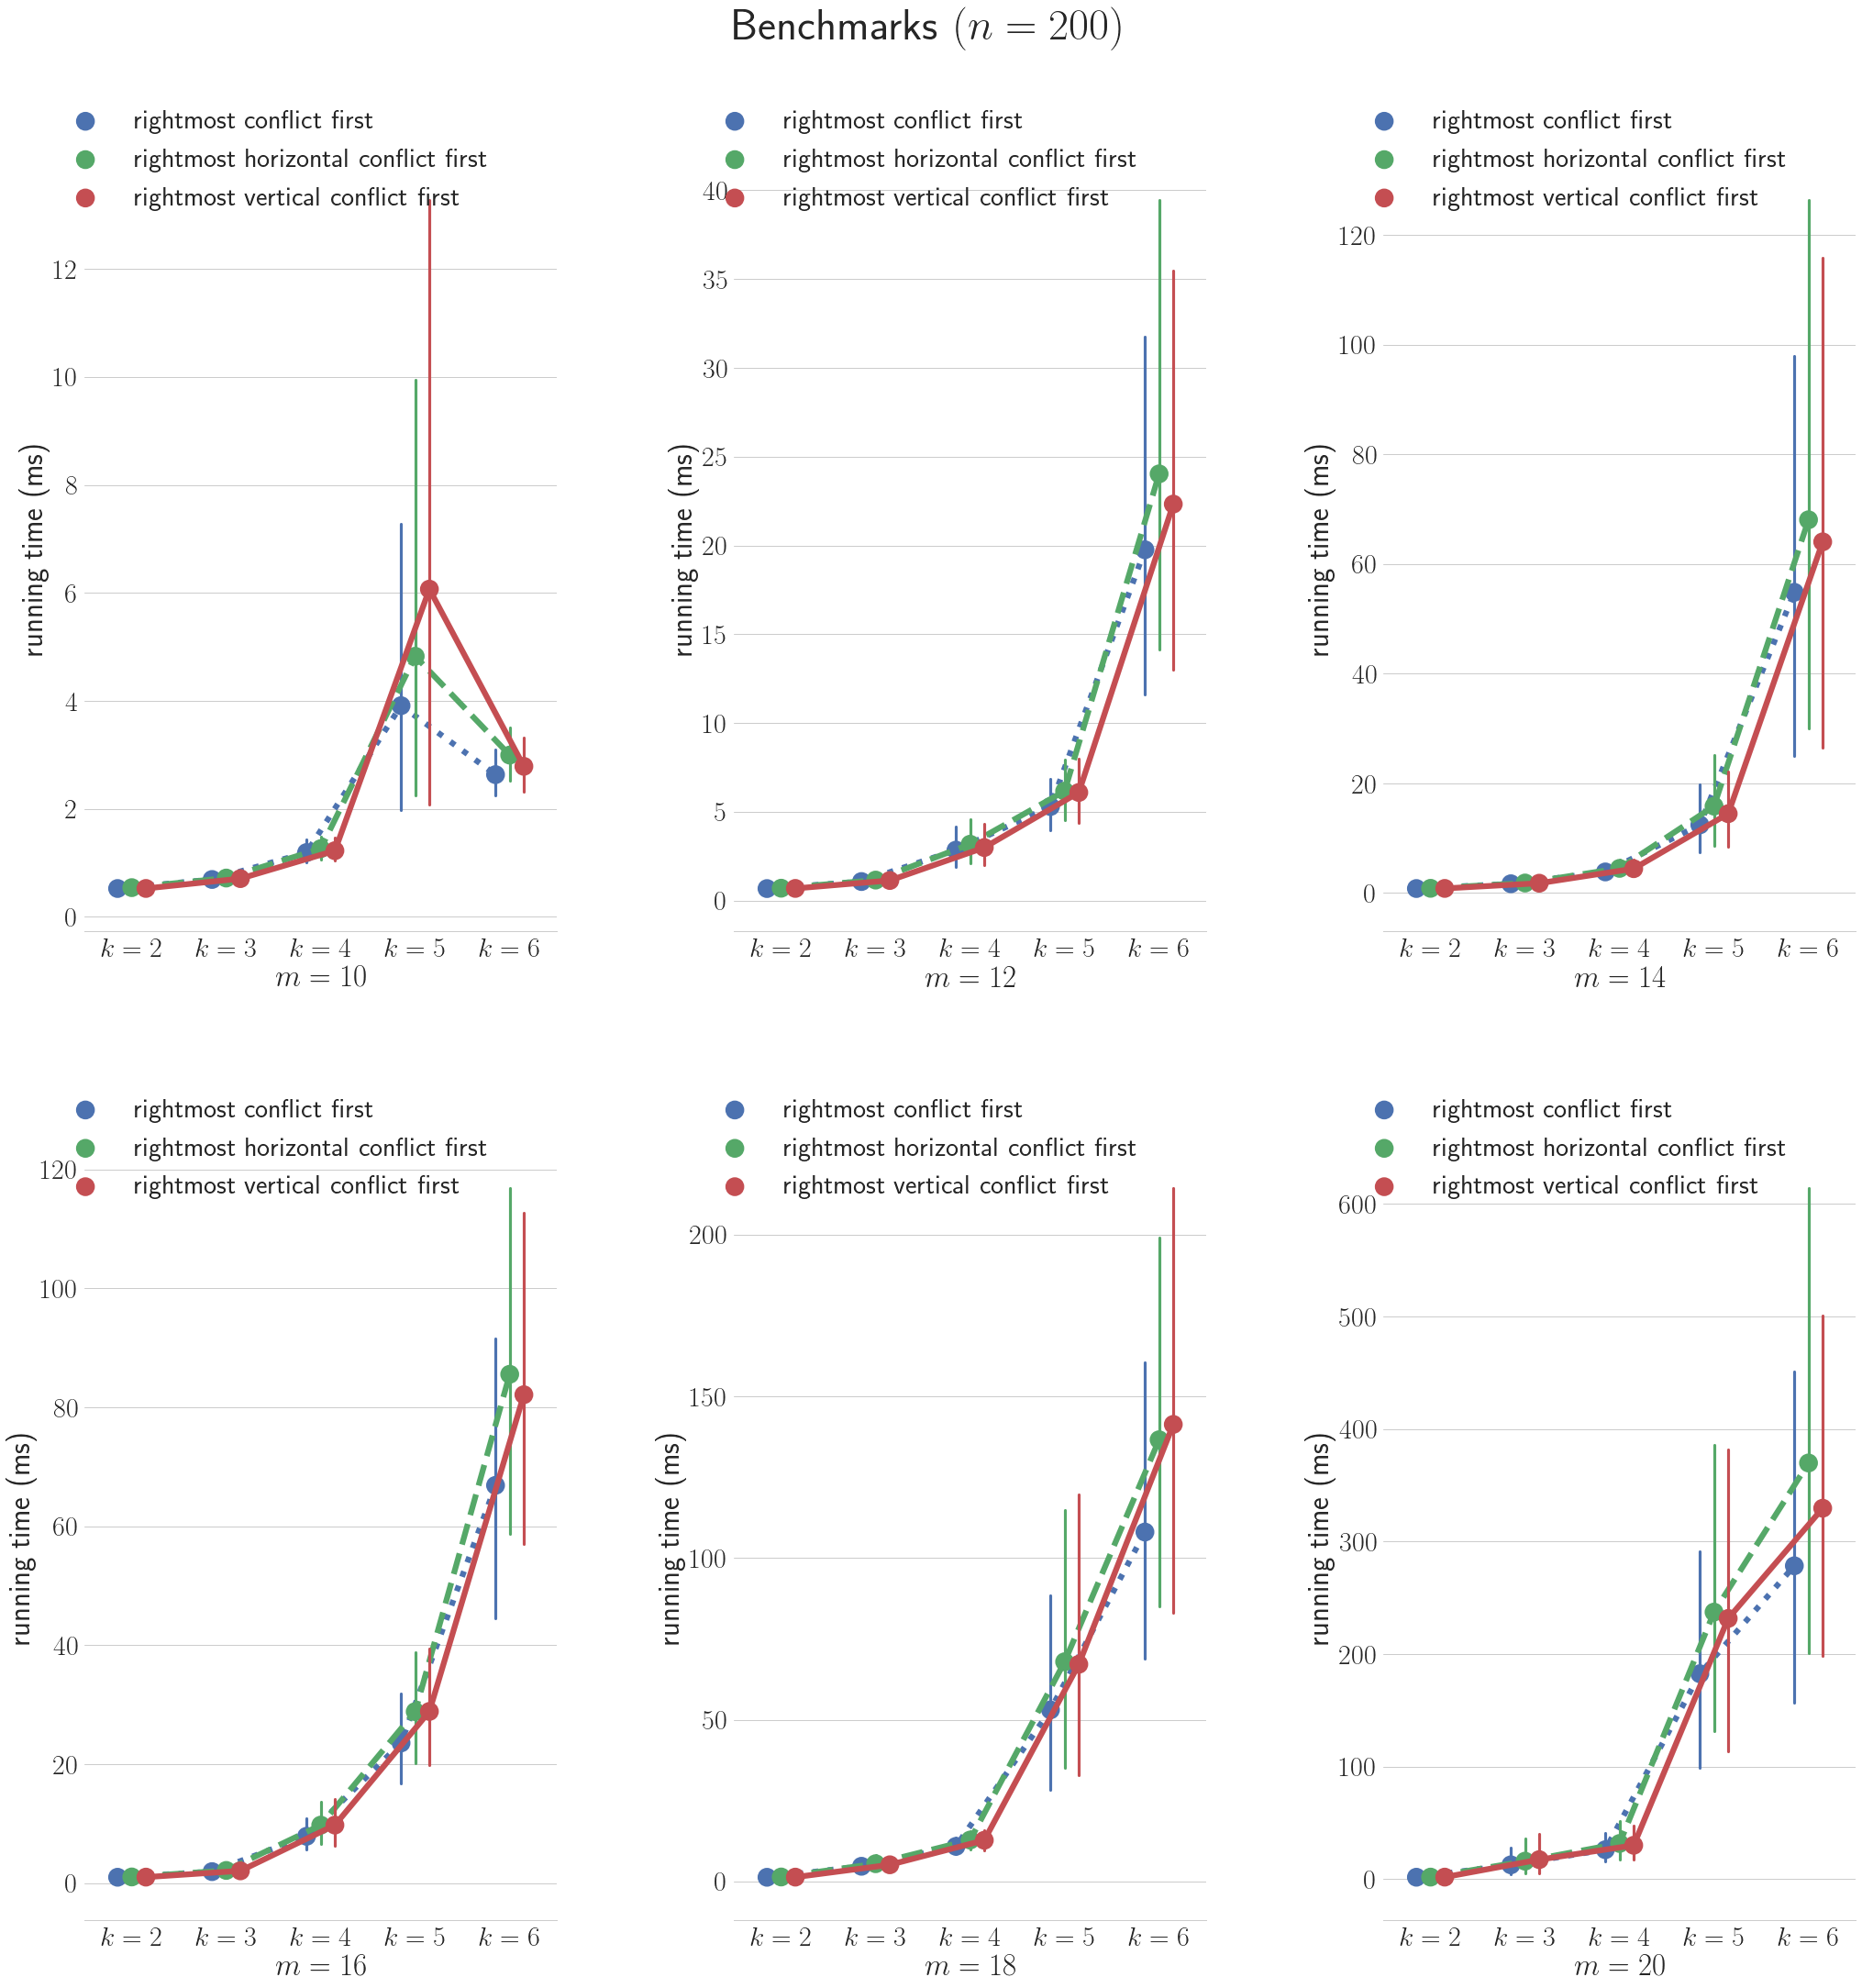

In [476]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['rightmost conflict first', 'rightmost horizontal conflict first', 'rightmost vertical conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.03)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=2.,
                      dodge=.3, join=True, markers=["o", "o", "o"], linestyles=[":", "--", "-"])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.105), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-rightmost-conflict-first', m, n, k, k])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [477]:
df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted([int(k) for k in df_complete.k.unique()])
print('k values={}'.format(k_values))

anova = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_excerpt = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_rightmost_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost conflict first']
        df_rightmost_horizontal_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost horizontal conflict first']
        df_rightmost_vertical_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost vertical conflict first']
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_rightmost_conflict_first_group['duration'].values,
                                       df_rightmost_horizontal_conflict_first_group['duration'].values, 
                                       df_rightmost_vertical_conflict_first_group['duration'].values
                                       )

m values=[10, 12, 14, 16, 18, 20]
k values=[2, 3, 4, 5, 6]


In [478]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=10, k=2, pvalue=0.8869373433533683
m=10, k=3, pvalue=0.6894363905753387
m=10, k=4, pvalue=0.6897817123534932
m=10, k=5, pvalue=0.8336315235213129
m=10, k=6, pvalue=0.6862185375069902
m=12, k=2, pvalue=0.9170307662242556
m=12, k=3, pvalue=0.8293288648031063
m=12, k=4, pvalue=0.690001053038852
m=12, k=5, pvalue=0.8278057483734933
m=12, k=6, pvalue=0.6225275487527983
m=14, k=2, pvalue=0.8546017646257706
m=14, k=3, pvalue=0.8537667255884374
m=14, k=4, pvalue=0.6107646209515682
m=14, k=5, pvalue=0.8776602840528321
m=14, k=6, pvalue=0.60317028212636
m=16, k=2, pvalue=0.8302888671027611
m=16, k=3, pvalue=0.7696094114639088
m=16, k=4, pvalue=0.5237715170282892
m=16, k=5, pvalue=0.7244539081034658
m=16, k=6, pvalue=0.7450531113875286
m=18, k=2, pvalue=0.7436358827366415
m=18, k=3, pvalue=0.8999711889476897
m=18, k=4, pvalue=0.6777438960536639
m=18, k=5, pvalue=0.6441921147654057
m=18, k=6, pvalue=0.5391137929379476
m=20, k=2, pvalue=0.8726648629483266
m=20, k=3, pvalue=0.7184615784381398
m=20

i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


TypeError: sequence item 3: expected str instance, int found

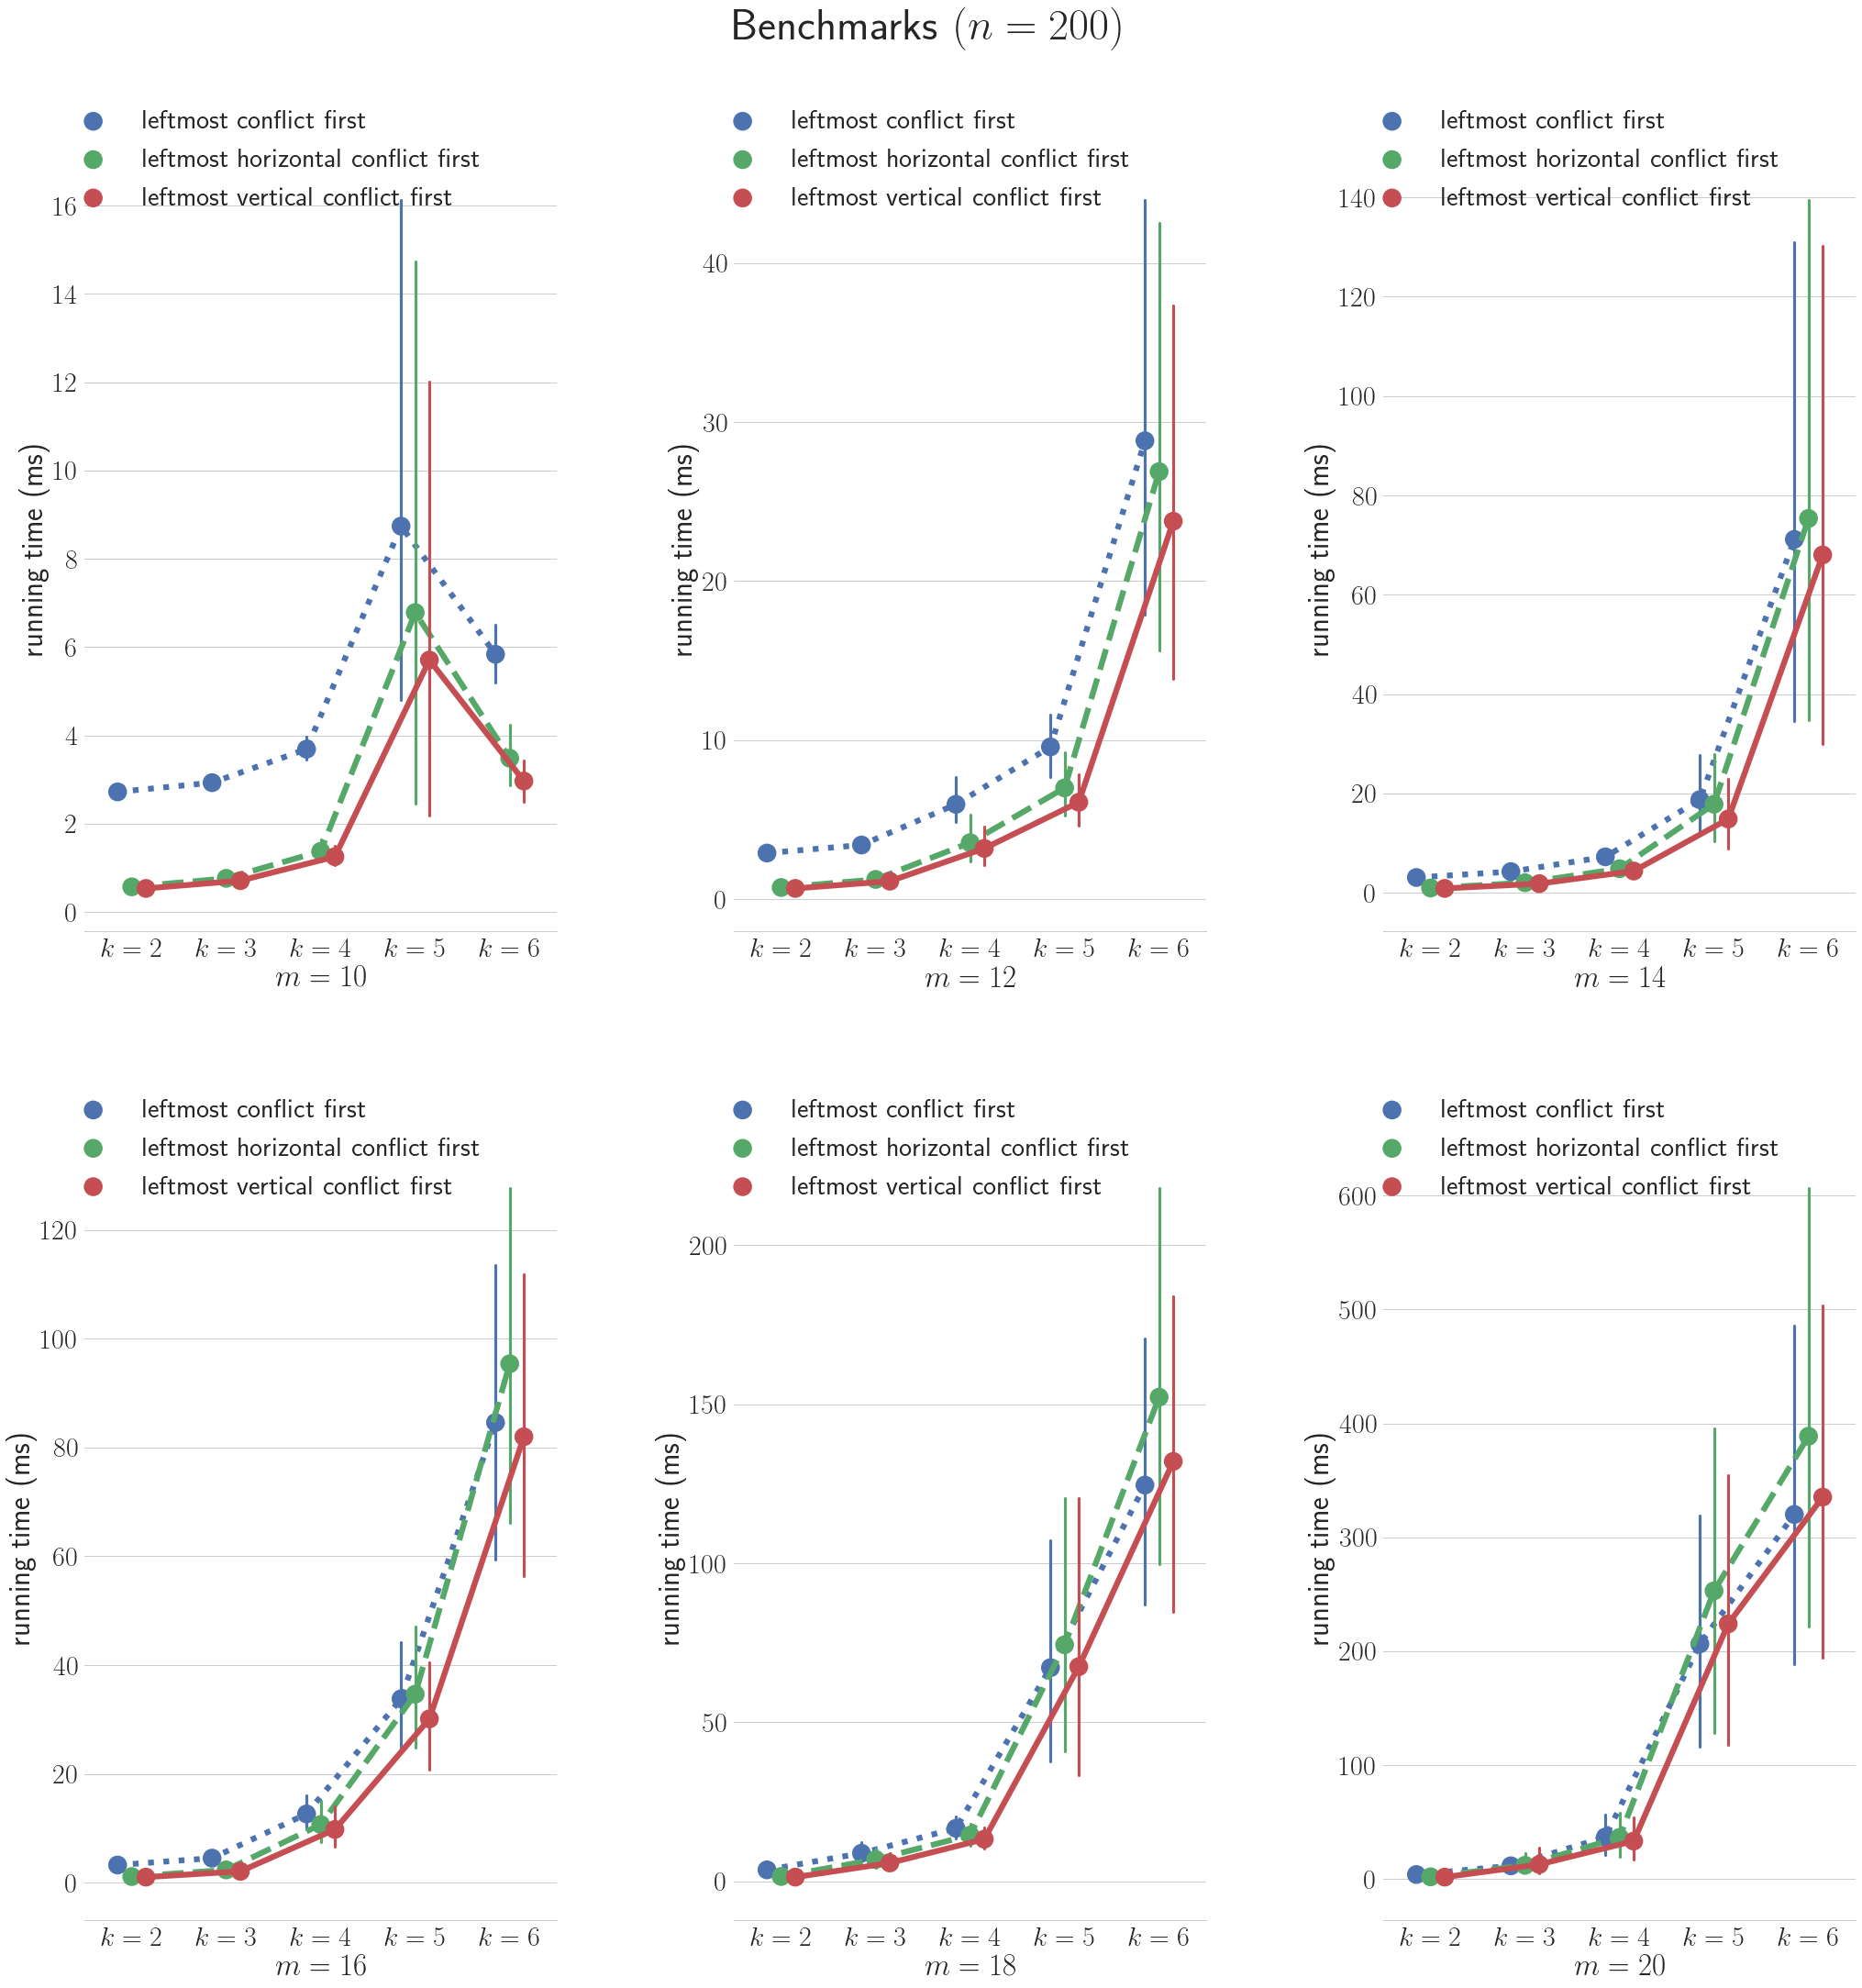

In [479]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['leftmost conflict first', 'leftmost horizontal conflict first', 'leftmost vertical conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.03)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=2.,
                      dodge=.3, join=True, markers=["o", "o", "o"], linestyles=[":", "--", "-"])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.105), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-leftmost-conflict-first', m, n, k, k])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [459]:
df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted([int(k) for k in df_complete.k.unique()])
print('k values={}'.format(k_values))

anova = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_excerpt = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost conflict first']
        df_leftmost_horizontal_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost horizontal conflict first']
        df_leftmost_vertical_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost vertical conflict first']
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_leftmost_conflict_first_group['duration'].values,
                                       df_leftmost_horizontal_conflict_first_group['duration'].values, 
                                       df_leftmost_vertical_conflict_first_group['duration'].values
                                       )

m values=[10, 12, 14, 16, 18, 20]
k values=[2, 4, 6, 8, 10]


In [460]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=10, k=2, pvalue=1.1545404768502147e-150
m=10, k=4, pvalue=0.01816946345732898
m=10, k=6, pvalue=0.6749477170653924
m=10, k=8, pvalue=0.6494339056606385
m=10, k=10, pvalue=0.8607706964490024
m=12, k=2, pvalue=0.010154172645579052
m=12, k=4, pvalue=0.23818139595954624
m=12, k=6, pvalue=0.8690701207068704
m=12, k=8, pvalue=0.9544193847345728
m=12, k=10, pvalue=0.8819690400555439
m=14, k=2, pvalue=0.018632177324980202
m=14, k=4, pvalue=0.9544198142679698
m=14, k=6, pvalue=0.8781802383778787
m=14, k=8, pvalue=0.9580330842559966
m=14, k=10, pvalue=0.7932337595461283
m=16, k=2, pvalue=0.33263762848685235
m=16, k=4, pvalue=0.9053668971586639
m=16, k=6, pvalue=0.9120872504322148
m=16, k=8, pvalue=0.7582450997894756
m=16, k=10, pvalue=0.852380798377828
m=18, k=2, pvalue=0.9096286037627268
m=18, k=4, pvalue=0.9652753027203176
m=18, k=6, pvalue=0.9028990612982801
m=18, k=8, pvalue=0.7708757710402906
m=18, k=10, pvalue=0.7424266785939664
m=20, k=2, pvalue=0.896729278799536
m=20, k=4, pvalue=0.850

i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


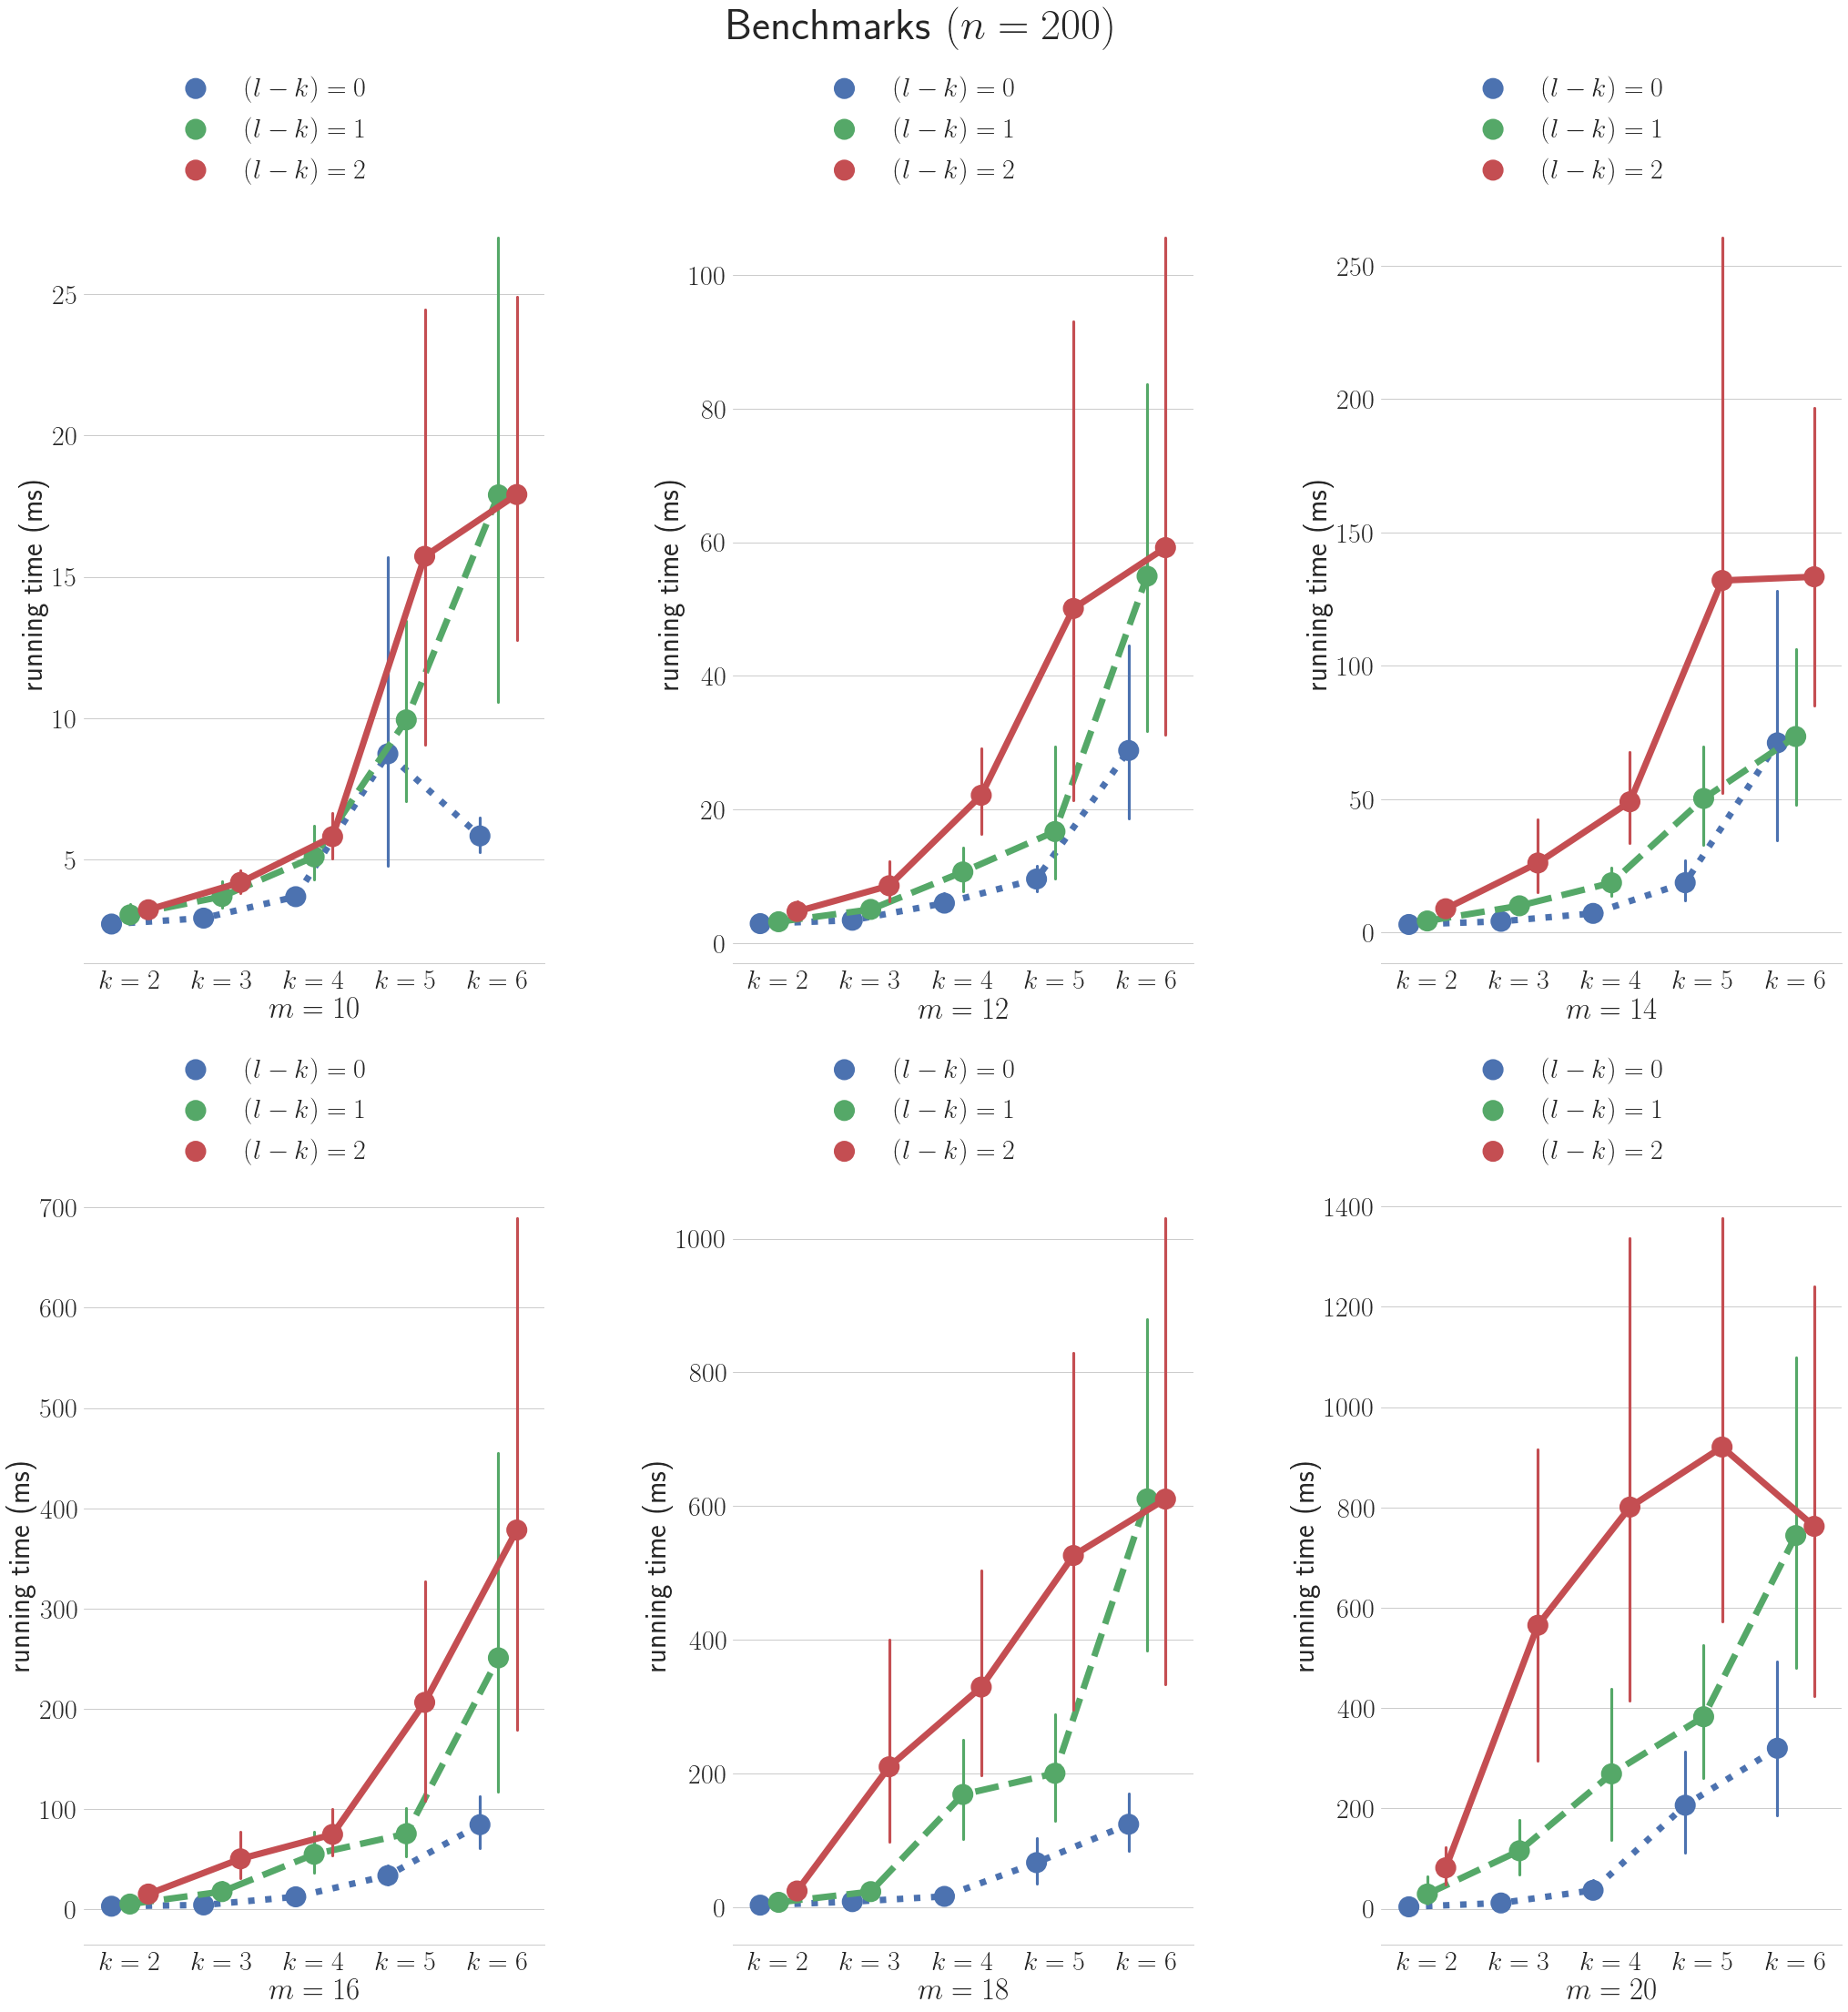

In [488]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['leftmost conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.05)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, str(l).zfill(2))] for k in ks for l in [k, str(int(k)+1), str(int(k)+2)]])
        data['delta'] = data['l'].apply(lambda l: int(l)) - data['k'].apply(lambda k: int(k))
        data['delta'] = data['delta'].apply(lambda d: r'$(l - k) = {}$'.format(d))
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        #print(data)
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="delta", scale=2.25,
                      dodge=.4, join=True, markers=["o", "o", "o"], linestyles=[":", "--", "-"])

        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.2), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-leftmost-conflict-first-varying-l', m, n])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [236]:
mpl.rcParams['figure.figsize'] = (20.0, 8.0)

df = pd.read_csv('ppattern-estimate-split-10-100-10.csv', names = ['n', 'k'])

ax = sns.boxplot(x="n", y="k", data=df, whis=np.inf, color="c")
stripplot = sns.stripplot(x="n", y="k", data=df, jitter=True, size=3, color=".3", linewidth=0)

fig = stripplot.get_figure()
fig.savefig('ppattern-estimate-split-10-100-10.pdf', format='pdf', close=True, verbose=True, dpi=1200)

FileNotFoundError: File b'ppattern-estimate-split-10-100-10.csv' does not exist

[ 10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44
  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80
  82  84  86  88  90  92  94  96  98 100]
8


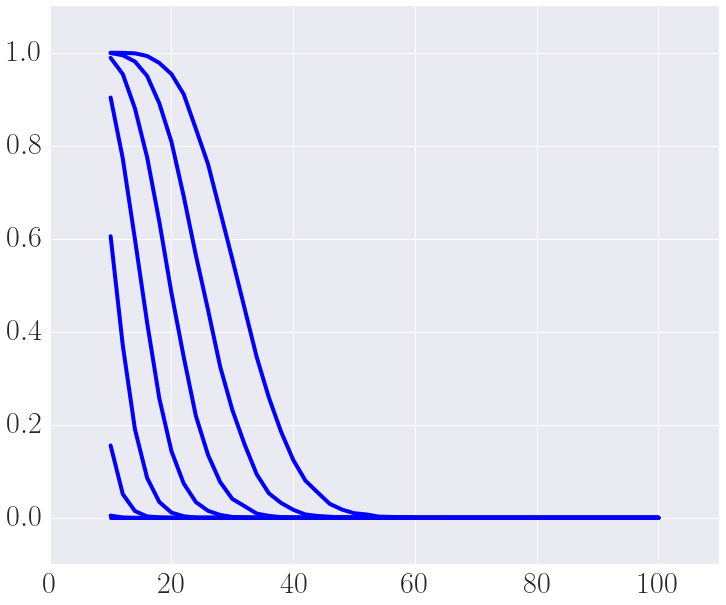

In [57]:
df = pd.read_csv('ppattern-estimate-split-10-100-2.csv', names = ['n', 'k'])

# distinct n
distinct_n = df.n.unique()
max_k = 8

print(distinct_n)
print(max_k)

t = {}
for n in distinct_n:
    t[n] = {}
    for k in range(1, max_k+1):
        t[n][k] = 0

for (_, row) in df.iterrows():
    n = row['n']
    k = int(row['k'])
    for j in range (k, max_k+1):
        t[n][j] += 1

for n in t:
    for k in t[n]:
        t[n][k] = float(t[n][k]) / 10000.0
        
t2 = {}
for n in t:
    for k in t[n]:
        if k not in t2:
            t2[k] = {} 
        t2[k][n] = t[n][k]
        

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (12.0, 10.0)
mpl.rcParams.update({'font.size': 8})

axes = plt.gca()
axes.set_xlim(0, 110)
axes.set_ylim(-0.1, 1.1)

for k in sorted(t2.keys()):
    xs = list(sorted(t2[k].keys()))
    ys = [t2[k][n] for n in xs]
    plt.plot(xs, ys, 'b-', linewidth=4.0)

plt.savefig("ppattern-estimate-split-10-100-2.pdf", bbox_inches='tight')

## Comparing strategies

Statistical analysis of the benchmarks for 3 strategies: 
**leftmost order conflict first**, **leftmost value conflict first** and **leftmost conflict**.

1. **leftmost order conflict first**. For resolving conflicts, the leftmost order conflict w.r.t to $x$-coordinate is selected. If there is no order conflict, the leftmost value conflict w.r.t to $x$-coordinate is selected.
2. **leftmost value conflict first**. For resolving conflicts, the leftmost value conflict w.r.t to $x$-coordinate is selected. If there is no value conflict, the leftmost order conflict w.r.t to $x$-coordinate is selected.
3. **leftmost conflict**. For resolving conflicts, the leftmost conflict w.r.t to $x$-coordinate is selected (this conflict is either an order conflict or a value conflict).

In [167]:
strategies = ['leftmost order conflict first', 'leftmost value conflict first', 'leftmost conflict']

df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted(df_complete.k.unique())
print('k values={}'.format(k_values))

df_details = {}
df_leftmost_order_conflict_first = {}
df_leftmost_value_conflict_first = {}
df_leftmost_conflict = {}
anova = {}
groups = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_m_k = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_order_conflict_first_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost order conflict first']
        df_leftmost_value_conflict_first_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost value conflict first']
        df_leftmost_conflict_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost conflict']
        


        # assign
        df_details[(m,k)] = df_m_k
        df_leftmost_order_conflict_first[(m, k)] = df_leftmost_order_conflict_first_m_k['duration'].values
        df_leftmost_value_conflict_first[(m, k)] = df_leftmost_value_conflict_first_m_k['duration'].values
        df_leftmost_conflict[(m, k)] = df_leftmost_conflict_m_k['duration'].values
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_leftmost_order_conflict_first[(m, k)], 
                                       df_leftmost_value_conflict_first[(m, k)],
                                       df_leftmost_conflict[(m, k)])

m values=[8, 10, 12, 14, 16, 18]
k values=[2, 4, 6, 8]


In [168]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=18, k=8, pvalue=0.5711461860272378
m=16, k=6, pvalue=0.726949910064542
m=16, k=8, pvalue=0.887774315288484
m=10, k=4, pvalue=7.365822237256172e-84
m=18, k=2, pvalue=8.99150394735824e-161
m=14, k=4, pvalue=0.00043494483403562625
m=10, k=6, pvalue=0.026438845265509235
m=16, k=2, pvalue=1.3658651629066387e-193
m=14, k=6, pvalue=0.55566021749566
m=18, k=6, pvalue=0.4092916108182827
m=12, k=4, pvalue=1.8185812830190133e-09
m=12, k=2, pvalue=0.0
m=14, k=2, pvalue=2.3500407253526693e-249
m=8, k=2, pvalue=0.0
m=10, k=8, pvalue=0.7041734087447162
m=16, k=4, pvalue=0.2677138101468426
m=18, k=4, pvalue=0.7371445831575976
m=12, k=6, pvalue=0.6154446494268735
m=10, k=2, pvalue=0.0
m=8, k=8, pvalue=6.954863824392422e-07
m=8, k=6, pvalue=2.4095330463753686e-23
m=8, k=4, pvalue=0.0
m=14, k=8, pvalue=0.5066567170177815
m=12, k=8, pvalue=0.07571959566257769


## Brenchmarking pattern matching for $321$-avoiding permutations

In [58]:
# read csv benchmark file
df_321_benchmarks = pd.read_csv('ppattern-321-avoiding-benchmark-8-18-100-600.csv', 
                                names = ['m', 'n', 'k', 'p', 'q', 'strategy', 'embedding', 'duration'])
        
# time in ms
df_321_benchmarks['duration'] = df_321_benchmarks['duration'].apply(lambda x: format(x))
    
# drop p column
df_321_benchmarks = df_321_benchmarks.drop('p', 1)
    
# drop q column
df_321_benchmarks = df_321_benchmarks.drop('q', 1)
    
# drop embedding column
df_321_benchmarks = df_321_benchmarks.drop('embedding', 1)

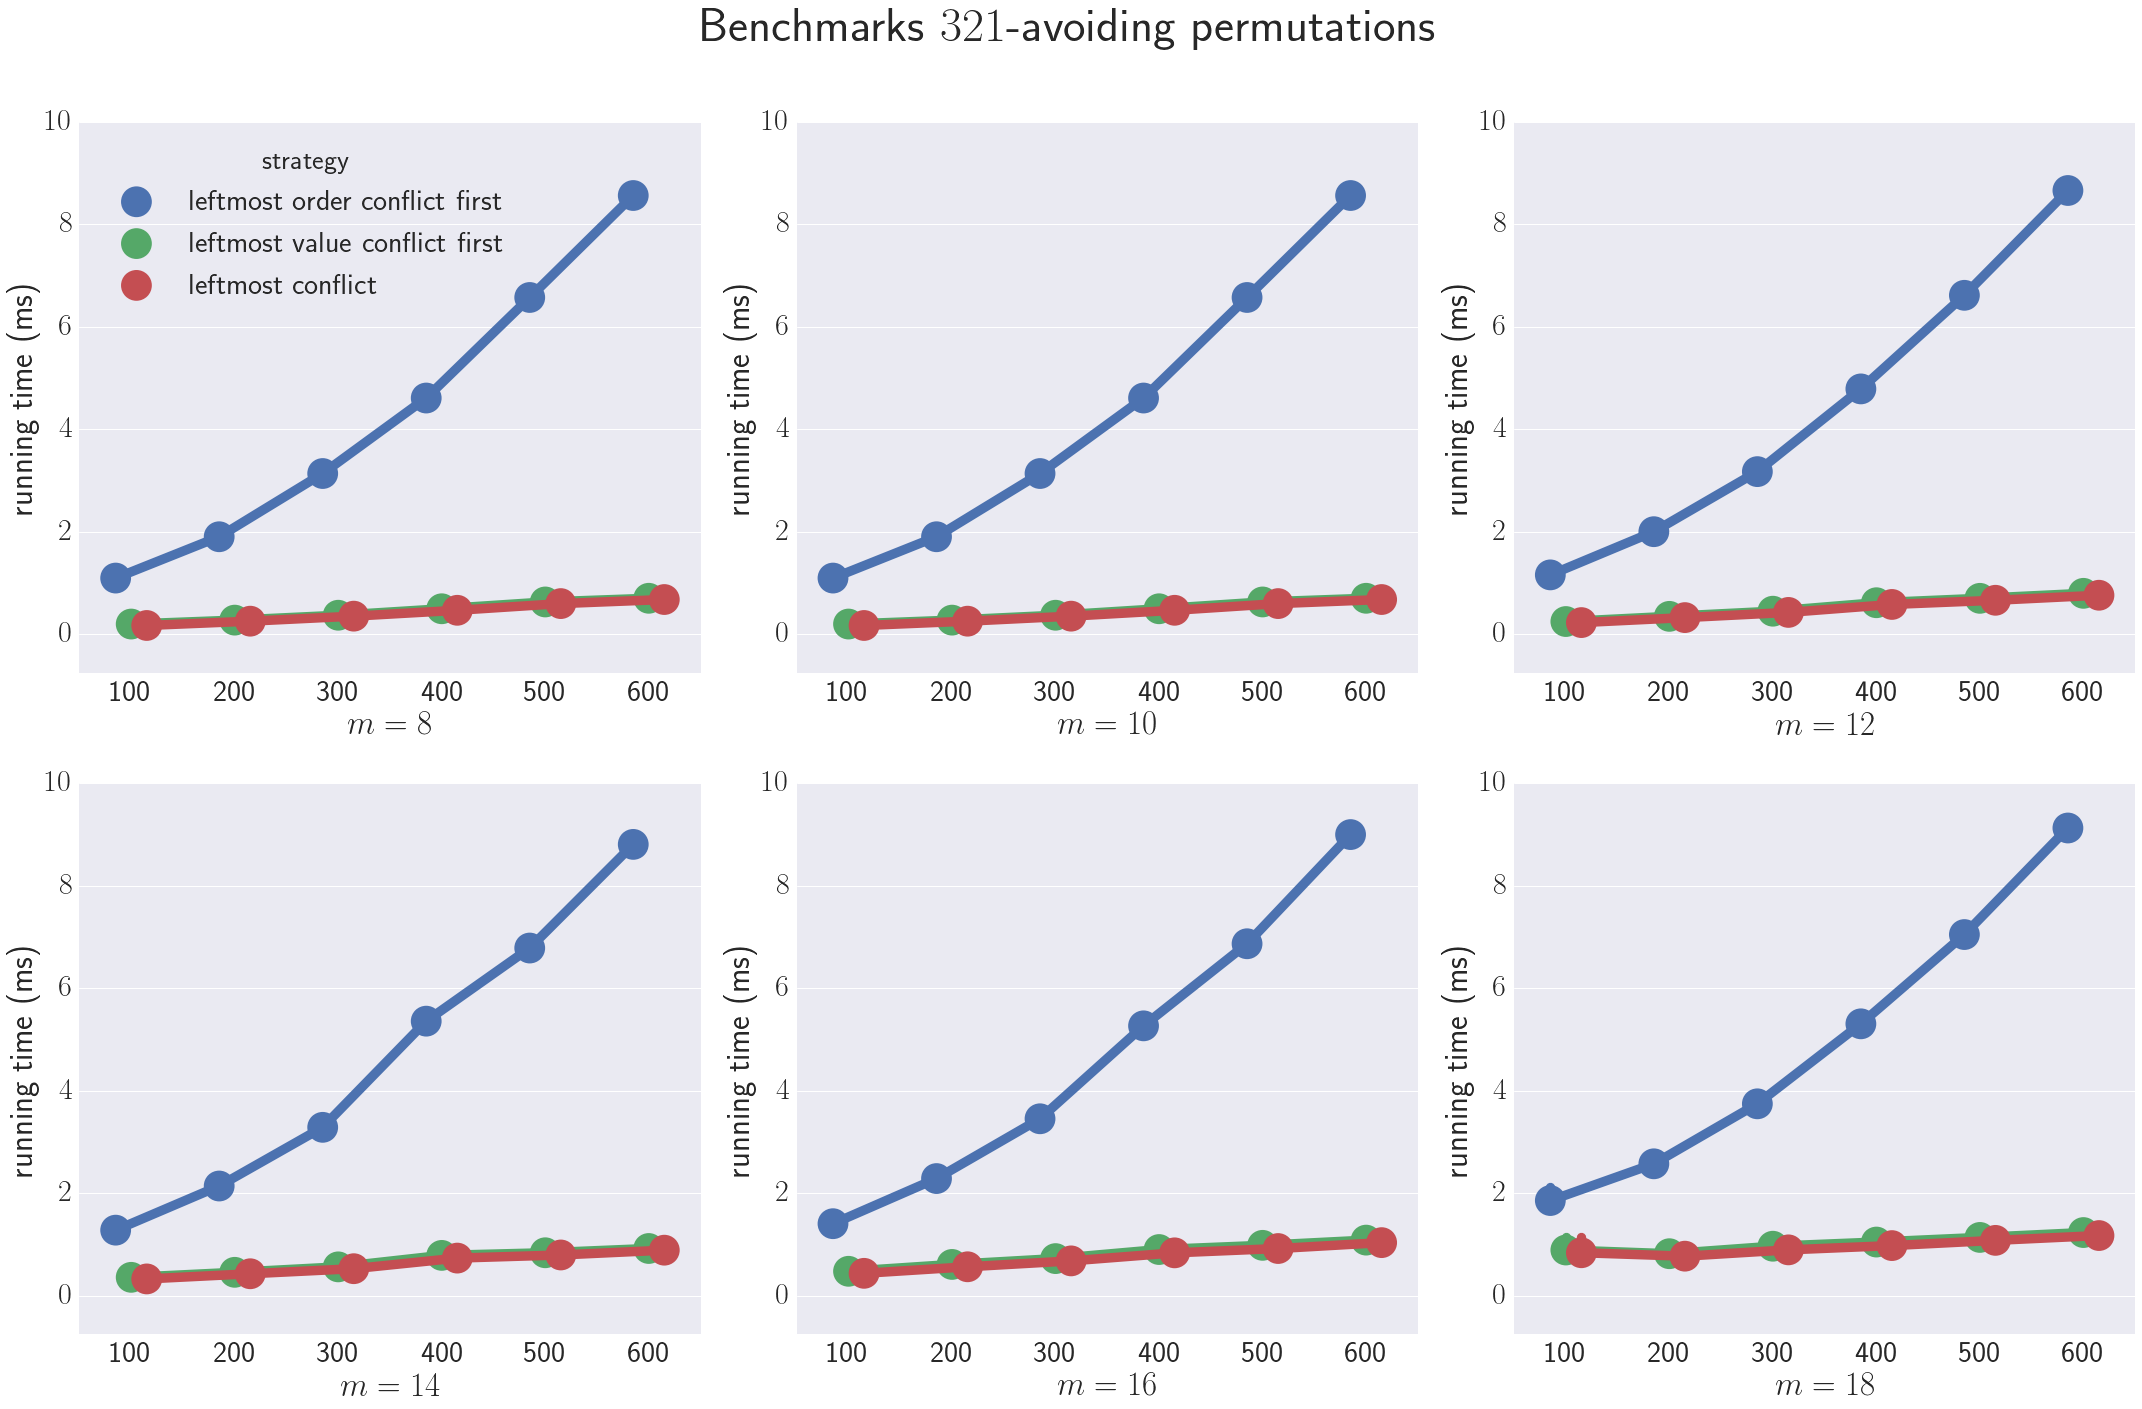

In [96]:
mpl.rcParams['figure.figsize'] = (30.0, 20.0)
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
fig.suptitle(r'Benchmarks $321$-avoiding permutations', fontsize=48)

df_321_benchmarks_8 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 10]
sns.pointplot(ax=axes[0][0], data=df_321_benchmarks_8, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][0].set(xlabel = r'$m=8$', ylabel=r'running time (ms)')
#axes[0][0].legend_.remove()
axes[0][0].set_ylim(-0.75,)

df_321_benchmarks_10 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 10]
sns.pointplot(ax=axes[0][1], data=df_321_benchmarks_10, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][1].set(xlabel = r'$m=10$', ylabel=r'running time (ms)')
axes[0][1].legend_.remove()
axes[0][1].set_ylim(-0.75,)

df_321_benchmarks_12 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 12]
sns.pointplot(ax=axes[0][2], data=df_321_benchmarks_12, x="n", y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][2].set(xlabel = r'$m=12$', ylabel=r'running time (ms)')
axes[0][2].legend_.remove()
axes[0][2].set_ylim(-0.75,)

df_321_benchmarks_14 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 14]
sns.pointplot(ax=axes[1][0], data=df_321_benchmarks_14, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][0].set(xlabel = r'$m=14$', ylabel=r'running time (ms)')
axes[1][0].legend_.remove()
axes[1][0].set_ylim(-0.75,)

df_321_benchmarks_16 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 16]
sns.pointplot(ax=axes[1][1], data=df_321_benchmarks_16, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][1].set(xlabel = r'$m=16$', ylabel=r'running time (ms)')
axes[1][1].legend_.remove()
axes[1][1].set_ylim(-0.75,)

df_321_benchmarks_18 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 18]
sns.pointplot(ax=axes[1][2], data=df_321_benchmarks_18, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][2].set(xlabel = r'$m=18$', ylabel=r'running time (ms)')
axes[1][2].legend_.remove()
axes[1][2].set_ylim(-0.75,)

sns.despine(left=True) 
plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
fig.subplots_adjust(top=0.9)

fig.savefig('ppattern-benchmarks-321-avoiding.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [97]:
strategies = ['leftmost order conflict first', 'leftmost value conflict first', 'leftmost conflict']

m_values   = sorted(df_321_benchmarks.m.unique())
print('m values={}'.format(m_values))
n_values = sorted(df_321_benchmarks.n.unique())
print('n values={}'.format(n_values))

df_details = {}
df_leftmost_order_conflict_first = {}
df_leftmost_value_conflict_first = {}
df_leftmost_conflict = {}
anova = {}
groups = {}
for m in m_values:
    for n in n_values:
        # select rows
        df_m_n = df_321_benchmarks.loc[(df_321_benchmarks['m'] == m) & (df_321_benchmarks['n'] == n)]
        
        # extract individual stategy groups
        df_leftmost_order_conflict_first_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost order conflict first']
        df_leftmost_value_conflict_first_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost value conflict first']
        df_leftmost_conflict_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost conflict']
        
        # assign
        df_details[(m, n)] = df_m_n
        df_leftmost_order_conflict_first[(m, n)] = df_leftmost_order_conflict_first_m_n['duration'].values
        df_leftmost_value_conflict_first[(m, n)] = df_leftmost_value_conflict_first_m_n['duration'].values
        df_leftmost_conflict[(m, n)] = df_leftmost_conflict_m_n['duration'].values
        
        # Perform the ANOVA
        anova[(m, n)] = stats.f_oneway(df_leftmost_order_conflict_first[(m, n)], 
                                       df_leftmost_value_conflict_first[(m, n)],
                                       df_leftmost_conflict[(m, n)])

m values=[8, 10, 12, 14, 16, 18]
n values=[100, 200, 300, 400, 500, 600]


In [98]:
anova

{(8, 100): F_onewayResult(statistic=19129.069407245192, pvalue=0.0),
 (8, 200): F_onewayResult(statistic=19682.832053031965, pvalue=0.0),
 (8, 300): F_onewayResult(statistic=22134.562733128732, pvalue=0.0),
 (8, 400): F_onewayResult(statistic=19192.25959862825, pvalue=0.0),
 (8, 500): F_onewayResult(statistic=25226.672128700076, pvalue=0.0),
 (8, 600): F_onewayResult(statistic=22038.143676015119, pvalue=0.0),
 (10, 100): F_onewayResult(statistic=13791.624725457968, pvalue=0.0),
 (10, 200): F_onewayResult(statistic=17207.947715924503, pvalue=0.0),
 (10, 300): F_onewayResult(statistic=16433.96620462451, pvalue=0.0),
 (10, 400): F_onewayResult(statistic=20725.600032967723, pvalue=0.0),
 (10, 500): F_onewayResult(statistic=17956.672174959593, pvalue=0.0),
 (10, 600): F_onewayResult(statistic=26525.856890026345, pvalue=0.0),
 (12, 100): F_onewayResult(statistic=8275.0613005522173, pvalue=0.0),
 (12, 200): F_onewayResult(statistic=11669.023035152324, pvalue=0.0),
 (12, 300): F_onewayResult(s

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for m in m_values:
    for n in n_values:
        tukey = pairwise_tukeyhsd(endog=df_m_n['duration'],     # Data
                                  groups=df_m_n['strategy'],   # Groups
                                  alpha=0.05)          # Significance level

        #tukey.plot_simultaneous()    # Plot group confidence intervals
        #plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
    
        print("m={}, n={}".format(m, n))
        print(tukey.summary())

m=8, n=100
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
            group1                        group2            meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------
      leftmost conflict       leftmost order conflict first  7.9542   7.8333  8.075   True 
      leftmost conflict       leftmost value conflict first  0.0585  -0.0624  0.1793 False 
leftmost order conflict first leftmost value conflict first -7.8957  -8.0166 -7.7748  True 
-------------------------------------------------------------------------------------------
m=8, n=200
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
            group1                        group2            meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------
      leftmost conflict       leftmost order conflict firs